# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# DataFrames

## Indexing, Slicing & Selection

[Source01](https://pandas.pydata.org/docs/user_guide/indexing.html),
[Source02](https://www.geeksforgeeks.org/slicing-indexing-manipulating-and-cleaning-pandas-dataframe/),
[Source03](https://www.tutorialspoint.com/python_pandas/python_pandas_indexing_and_selecting_data.htm),
[Source04](https://www.dataquest.io/blog/tutorial-indexing-dataframes-in-pandas/)

In [2]:
data = {"isim":["ali","elif","fatma", "mehmet"],"boy cm":[1.70,1.55,1.60,1.90],"kilo-kg":[70,55,60,80]}


In [3]:
df = pd.DataFrame(data, index = ["A","B","C","D"])
df
# DataFrame icine dict verirsek keyler column adi value lar value oluyor. Valuelari koseli parantez icinde yaziyoruz

,isim,boy cm,kilo-kg
A,ali,1.70,70
B,elif,1.55,55
C,fatma,1.60,60
D,mehmet,1.90,80


In [20]:
df.isim #bu sekilde yazim Series tarzi geri donduruyor

A       ali
B      elif
C     fatma
D    mehmet
Name: isim, dtype: object

In [21]:
df["isim"] # Series tarzi geri donduruyor

A       ali
B      elif
C     fatma
D    mehmet
Name: isim, dtype: object

In [11]:
df[["isim"]] #bu sekilde yazim dataFrame tarzi geri donduruyor. cift [[]] kullaniyoruz

,isim
A,ali
B,elif
C,fatma
D,mehmet


In [12]:
df[["kilo-kg", "isim"]] # sutun isimlerini bizim yazdigimiz siraya gore getirir

,kilo-kg,isim
A,70,ali
B,55,elif
C,60,fatma
D,80,mehmet


In [13]:
df[["isim","kilo-kg"]] 

,isim,kilo-kg
A,ali,70
B,elif,55
C,fatma,60
D,mehmet,80


In [15]:
df["A":"C"][["isim","boy cm"]] # A labelindan B labelina kadar(dahil) isim ve boy cm sutunlarini getir

,isim,boy cm
A,ali,1.70
B,elif,1.55
C,fatma,1.60


In [4]:
df["isim"]["B"]

'elif'

In [5]:
df["A":"C"][["isim"]]

,isim
A,ali
B,elif
C,fatma


## Creating a New Column

In [16]:
df

,isim,boy cm,kilo-kg
A,ali,1.70,70
B,elif,1.55,55
C,fatma,1.60,60
D,mehmet,1.90,80


In [8]:
df["boy*kilo"]  = df["boy cm"] * df["kilo-kg"]
df
#burada boy ve kilo sutunlarindaki degerleri karsilikli carpti ve "boy*kilo" adinda yeni bir sutun olusturup o sutuna atadi
# atama old. icin kalici degisiklik

,isim,boy cm,kilo-kg,boy*kilo
A,ali,1.70,70,119.00
B,elif,1.55,55,85.25
C,fatma,1.60,60,96.00
D,mehmet,1.90,80,152.00


In [15]:
df["new"] = np.arange(4) # verdigimiz degerler satir sayisiyla ayni adette olmali
df
# burada "new" adinda yeni bir sutun olusturdu ve deger olarak 4 e kadar degerleri verdi

,isim,boy cm,kilo-kg,boy*kilo,new
A,ali,1.70,70,119.00,0
B,elif,1.55,55,85.25,1
C,fatma,1.60,60,96.00,2
D,mehmet,1.90,80,152.00,3


## Removing Columns & Rows

drop() yöntemi, bir Pandas DataFrame'den belirtilen satır veya sütunu kaldırmak için kullanılır. 

Eğer sütun kaldırılacaksa, axis='columns' parametresi kullanılır ve belirtilen sütun kaldırılır. 

Benzer şekilde, eğer bir satır kaldırılacaksa, axis='index' parametresi kullanılır ve belirtilen satır kaldırılır.

Bu yöntem, DataFrame'den istenmeyen verileri kaldırmak ve veri manipülasyonu yapmak için sıkça kullanılır.

In [16]:
df

,isim,boy cm,kilo-kg,boy*kilo,new
A,ali,1.70,70,119.00,0
B,elif,1.55,55,85.25,1
C,fatma,1.60,60,96.00,2
D,mehmet,1.90,80,152.00,3


In [ ]:
df.drop(["new"], axis =1 ,inplace =False) # inplace= False oldugu icin kalici degisiklik yapmadi.
                                           # kalici degisiklik yapmak istersek inplace =True yapmamiz gerekir

In [17]:
df.drop(["new"], axis =1 ,inplace =True) # kalici olarak new sutununu sildi
df

,isim,boy cm,kilo-kg,boy*kilo
A,ali,1.70,70,119.00
B,elif,1.55,55,85.25
C,fatma,1.60,60,96.00
D,mehmet,1.90,80,152.00


In [18]:
df.drop(["kilo-kg","boy*kilo"],axis=1) 
# bu yazim kalici degisiklik yapmaz inplace default olarak inplace= False tur.
# burada birden fazla sutunu gecici sildik

,isim,boy cm
A,ali,1.70
B,elif,1.55
C,fatma,1.60
D,mehmet,1.90


In [19]:
df.drop(["A","B"]) 
# axis default olarak axis = 0 dir yani satirlar uzerinde islem yapar.
# A ve B labellarini gecici sildi

,isim,boy cm,kilo-kg,boy*kilo
C,fatma,1.6,60,96.0
D,mehmet,1.9,80,152.0


## Selecting Rows and Columns using .loc[ ] and iloc[ ]

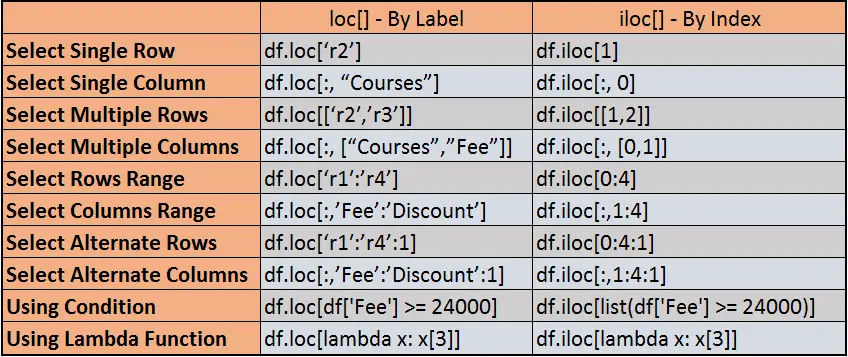

loc: label-based

iloc: integer position-based

loc, "location"ın kısaltmasıdır ve satır ve sütun adlarına göre veriye erişmeyi sağlar.

loc, satır ve sütun etiketleri kullanarak belirli bir konumda bulunan veriye erişmek için kullanılır.

iloc, "integer location"ın kısaltmasıdır ve satır ve sütun numaralarına göre veriye erişmeyi sağlar.

iloc, satır ve sütun numaralarını kullanarak belirli bir konumda bulunan veriye erişmek için kullanılır.

1- Etiket veya dizin bağımsızlığı:Geleneksel indexleme yöntemleri, indekslerdeki değişikliklerden etkilenirken, "loc" ve "iloc" yöntemleri, konumlarına göre seçim yaparlar. Bu nedenle, veri setindeki indekslerdeki değişiklikler "loc" ve "iloc" yöntemleriyle yapılan seçimlerde bir sorun yaratmaz.

2-Hızlı performans: "iloc" fonksiyonu, sadece satır ve sütun dizinleri kullanarak veri seçimi yapar, bu nedenle loc fonksiyonuna göre daha hızlı çalışır. Bu özellik, büyük veri kümelerinde veya performans açısından kritik uygulamalarda faydalıdır.

3-Esneklik: Geleneksel indexleme yöntemleri, sadece sıfırdan başlayan, ardışık tam sayılar kullanarak indexlemeye izin verir. "loc" ve "iloc" yöntemleri ise etiket veya dizin değerlerine dayanır ve daha esnek bir seçim yapma imkanı sağlar. "loc" ve "iloc" fonksiyonları, veri çerçevesindeki satır ve sütunların bir arada kullanımına izin verir. Örneğin, belirli bir sütunda belirli bir satırdaki veriyi seçmek için hem satır hem de sütun etiketlerini veya dizinlerini kullanabilirsiniz. Bu esneklik, veri işleme işlemlerinde kullanışlıdır.

4-Daha okunaklı kod: "loc" ve "iloc" fonksiyonları, kodun daha okunaklı hale gelmesine yardımcı olur.

In [22]:
data = np.arange(20).reshape(5,4)
df = pd.DataFrame(data=data,columns=["col1","col2","col3","col4"],index = range(1,6)) 
# index yazmazsak 0 dan  default olarak baslar
# columns yazmazsak 0 dan default olarak baslar
df

,col1,col2,col3,col4
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [25]:
# tek bir satir getirme loc ile
df.loc[[3]] #loc() label ile ilgilidir. 3. label in columnlarini ve value larini  getirir 

,col1,col2,col3,col4
3,8,9,10,11


In [26]:
# tek bir satir getirme iloc ile
df.iloc[[2]] #iloc index ile calisir

,col1,col2,col3,col4
3,8,9,10,11


In [29]:
# tek bir sutun getirme loc ile
df.loc[:,["col2"]]

,col2
1,1
2,5
3,9
4,13
5,17


In [31]:
# tek bir sutun getirme iloc ile
df.iloc[:,[1]]

,col2
1,1
2,5
3,9
4,13
5,17


In [32]:
#coklu satir getirme loc ile
df.loc[[3,5]]

,col1,col2,col3,col4
3,8,9,10,11
5,16,17,18,19


In [33]:
# coklu satir getirme iloc ile
df.iloc[[2,4]]

,col1,col2,col3,col4
3,8,9,10,11
5,16,17,18,19


In [36]:
# coklu sutun getirme loc ile
df.loc[:,['col2','col4']]

,col2,col4
1,1,3
2,5,7
3,9,11
4,13,15
5,17,19


In [39]:
#coklu sutun getirme iloc ile
df.iloc[:,[1,3]]

,col2,col4
1,1,3
2,5,7
3,9,11
4,13,15
5,17,19


In [28]:
# belli bir satir araliginda loc ile
df.loc[2:5] # burada 2.labeldan 5.labela(5.de dahil) kadar olan label, column ve valuelarini getirdi

,col1,col2,col3,col4
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [40]:
#belli bir satir araliginda iloc ile
df.iloc[1:4]

,col1,col2,col3,col4
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


In [45]:
# belli bir sutun araliginda loc ile
df.loc[:,'col2':'col4']

,col2,col3,col4
1,1,2,3
2,5,6,7
3,9,10,11
4,13,14,15
5,17,18,19


In [46]:
# belli bir sutun araliginda iloc ile 
df.iloc[:,1:3]

,col2,col3
1,1,2
2,5,6
3,9,10
4,13,14
5,17,18


In [49]:
df.loc[2:5:3] #star ,stop ,step ile

,col1,col2,col3,col4
2,4,5,6,7
5,16,17,18,19


In [51]:
df.iloc[1:5:3] #start ,stop ,step ile satir

,col1,col2,col3,col4
2,4,5,6,7
5,16,17,18,19


In [52]:
df.loc[:,'col2':'col5':2] #start stop step ile sutun

,col2,col4
1,1,3
2,5,7
3,9,11
4,13,15
5,17,19


In [53]:
df.iloc[:,1:4:2]

,col2,col4
1,1,3
2,5,7
3,9,11
4,13,15
5,17,19


In [55]:
# condition kullanimi loc ile
df.loc[df['col2']>=9]

,col1,col2,col3,col4
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [58]:
# condition kullanimi iloc ile
df.iloc[list(df['col2']>=9)]

,col1,col2,col3,col4
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [13]:
df

,col1,col2,col3,col4
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [30]:
df.iloc[2:5] # iloc index ile calisir stop dahil degildir, loc ise label ile calisir stop dahildir

,col1,col2,col3,col4
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [31]:
df.iloc[1:]

,col1,col2,col3,col4
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [18]:
df.index = "a b c d e".split() #burada diyoruz ki df in indexlerini verilen degerlere gore yenile. kolay kullanim olarak split ile yaptik
df

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [35]:
df.loc["b":"d"]

,col1,col2,col3,col4
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [36]:
df.iloc[1:4]

,col1,col2,col3,col4
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15


In [37]:
df.loc["b","col2"] #virgulun solu labellari virgulun sagi column lari aliyor

5

In [40]:
df.loc[["b"],["col2"]]

,col2
b,5


In [38]:
df.iloc[1,1] #virgulun solu satir indexi virgulun sagi sutun indexini aliyor

5

In [42]:
df.iloc[[1],[1]]

,col2
b,5


In [45]:
df.iloc[1]["col2"]

5

In [46]:
df.loc["d":"e"][["col3"]]

,col3
d,14
e,18


In [24]:
df

,col1,col2,col3,col4
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [26]:
df.loc["d":"e"][["col2","col1"]] #d labelindan e labelina(dahil) col2 ve col1 sutunlarini getir

,col2,col1
d,13,12
e,17,16


## Conditional Selection

In [27]:
df=pd.DataFrame(np.random.randn(5,4),index = "a b c d e".split(), columns=["A","B","C","D"])
# 5 satir 4 sutun boyutundan random degerler olustur
df

,A,B,C,D
a,2.830743,-1.800460,1.675985,-0.011340
b,-1.823410,-0.334845,0.757324,1.367047
c,0.302677,1.127653,1.448251,-0.235681
d,0.518703,0.360333,0.767477,1.151523
e,-3.202917,0.111890,2.277278,-2.870177


In [66]:
df_2=pd.DataFrame(np.random.randn(5,4),index = "a b c d e".split(), columns="A B C D".split())
df_2

,A,B,C,D
a,-1.220578,0.168331,-1.279326,-0.291032
b,0.063718,-0.996875,-0.970184,0.244812
c,-0.728799,-1.242273,-0.990580,0.249750
d,-0.161247,-0.974158,-0.710053,-1.006856
e,0.336256,0.881171,1.542882,0.053370


In [67]:
df_2[df_2["A"] > 0]

,A,B,C,D
b,0.063718,-0.996875,-0.970184,0.244812
e,0.336256,0.881171,1.542882,0.053370


In [57]:
df > 0 # bu sekilde kosul kullanirsak kosulu saglayan valuelar yerine True, kosulu saglamayanlar yerine False dondurur

,A,B,C,D
a,False,True,True,False
b,False,True,True,False
c,True,True,False,True
d,True,True,False,True
e,False,False,False,True


In [58]:
df[df > 0 ] 
# koseli parantez ile kosul kullanirsak kosulu saglayan valuelari getirir kosula uymayan value lar yerine NaN dondurur

,A,B,C,D
a,NaN,0.738884,0.179486,NaN
b,NaN,1.128042,0.381915,NaN
c,0.055484,0.363860,NaN,1.794784
d,1.407574,1.276139,NaN,0.023962
e,NaN,NaN,NaN,3.100612


In [30]:
df[df["A"] > 0]

,A,B,C,D
a,2.830743,-1.800460,1.675985,-0.011340
c,0.302677,1.127653,1.448251,-0.235681
d,0.518703,0.360333,0.767477,1.151523


In [60]:
df[df["A"]> 0][["C"]]

,C
a,NaN
b,NaN
c,NaN
d,NaN
e,NaN


In [70]:
df

,A,B,C,D
a,-0.629444,0.546331,-0.551640,0.633151
b,1.226771,0.973972,1.136029,-1.016438
c,0.698144,-0.643457,1.288039,-0.621970
d,1.373947,0.910422,-0.387415,-0.677685
e,-0.120128,-1.654305,0.762726,-0.957989


In [69]:
df[(df["A"] > 0)  &  (df["B"] < 0)] 
# A sutununda 0 dan buyuk satiri B sutunundan 0 dan kucuk satirlardan ortak olan satirlari getir.
# Iki kosulu da saglayan satir c satir

,A,B,C,D
c,0.698144,-0.643457,1.288039,-0.62197


In [71]:
df[(df["A"] > 0)  |  (df["B"] < 0)]
# A sutunu 0 dan buyuk satirlar veya B sutunu 0 dan kucuk satirlari getir

,A,B,C,D
b,1.226771,0.973972,1.136029,-1.016438
c,0.698144,-0.643457,1.288039,-0.621970
d,1.373947,0.910422,-0.387415,-0.677685
e,-0.120128,-1.654305,0.762726,-0.957989


## reset_index() & set_index()

reset_index(), DataFrame indeksini sıfırlar ve bunun yerine default hali kullanır.

set_index(), DataFrame'in belirtilen bir sütununu veya sütunlarını, DataFrame'in yeni bir indeksi olarak ayarlar.

In [2]:
df=pd.DataFrame(np.random.randn(5,4),index = "a b c d e".split(), columns=["A","B","C","D"])
df

,A,B,C,D
a,-0.840407,-0.075724,1.330567,0.014850
b,0.668475,0.482174,-1.079753,1.789633
c,0.999319,-1.173931,1.366628,0.425583
d,0.224276,-1.547781,-0.091897,1.623883
e,-0.463656,0.296050,-0.376165,0.085639


In [42]:
df.reset_index(drop = True , inplace = False)
# drop= True silme islemi, inplace = False  kalici degisiklik yapmiyor
# reset_index(), DataFrame indeksini sıfırlar ve bunun yerine default hali kullanır.
# index olmazsa olmaz oldugu icin, labelleri drop yaptiktan sonra, default indexleri getirdi

,A,B,C,D
0,0.315271,-1.515346,0.294468,0.802987
1,0.481104,-0.028558,-2.287117,0.558070
2,0.089563,-0.889772,-0.328153,1.513036
3,-0.255366,-0.770761,-1.235156,-0.640082
4,-1.008063,0.308500,-0.122376,-0.687953


In [43]:
df.reset_index(drop = True , inplace = True)
df
# drop= True silme islemi, inplace = True   kalici degisiklik yapti

,A,B,C,D
0,0.315271,-1.515346,0.294468,0.802987
1,0.481104,-0.028558,-2.287117,0.558070
2,0.089563,-0.889772,-0.328153,1.513036
3,-0.255366,-0.770761,-1.235156,-0.640082
4,-1.008063,0.308500,-0.122376,-0.687953


In [5]:
df.set_index("C") # kalici degisiklik yapmadi cunku default inplace = False  tur
# bu sekilde C sutununu artik index yapti
# set_index(), DataFrame'in belirtilen bir sütununu veya sütunlarını, DataFrame'in yeni bir indeksi olarak ayarlar.

In [4]:
df

,A,B,C,D
a,-0.840407,-0.075724,1.330567,0.014850
b,0.668475,0.482174,-1.079753,1.789633
c,0.999319,-1.173931,1.366628,0.425583
d,0.224276,-1.547781,-0.091897,1.623883
e,-0.463656,0.296050,-0.376165,0.085639


In [76]:
df.set_index("C", inplace = True) # kalici olarak C sutunundaki valule lar index(label) oldu

In [6]:
df

,A,B,D
C,,,
1.330567,-0.840407,-0.075724,0.014850
-1.079753,0.668475,0.482174,1.789633
1.366628,0.999319,-1.173931,0.425583
-0.091897,0.224276,-1.547781,1.623883
-0.376165,-0.463656,0.296050,0.085639


In [78]:
#tekrar index i default haline getirmek istersek
df.reset_index(inplace=True)
df

,C,A,B,D
0,-0.551640,-0.629444,0.546331,0.633151
1,1.136029,1.226771,0.973972,-1.016438
2,1.288039,0.698144,-0.643457,-0.621970
3,-0.387415,1.373947,0.910422,-0.677685
4,0.762726,-0.120128,-1.654305,-0.957989


In [83]:
 # drop() satir veya sutun siler
df.drop(["B"], axis= 1) # sutun silecegimiz zaman axis = 1 yapmak zorundayiz ve koseli parantez de zorunlu

,C,A,D
0,-0.551640,-0.629444,0.633151
1,1.136029,1.226771,-1.016438
2,1.288039,0.698144,-0.621970
3,-0.387415,1.373947,-0.677685
4,0.762726,-0.120128,-0.957989


In [84]:
df.drop(3) # satir silecegimiz zaman axis yazmak zorunda degiliz cunku default axis = 0 dir ve 
           # satirlari koseli parantez icine almak zorunda degiliz

,C,A,B,D
0,-0.551640,-0.629444,0.546331,0.633151
1,1.136029,1.226771,0.973972,-1.016438
2,1.288039,0.698144,-0.643457,-0.621970
4,0.762726,-0.120128,-1.654305,-0.957989


# Some Useful Methods with Titanic Dataset

In [1]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [8]:
sns.get_dataset_names() #icinde gomulu data setlerini gorebiliriz

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [9]:
df =sns.load_dataset("titanic") # load_dataset() icine yuklemek istedigimiz datasetinin adini tirnak icine yaziyoruz
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [90]:
df.head() # ilk 5 satiri getirdi

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
df.tail() # son 5 satiri getirdi

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [93]:
df.sample(5) # karisik olarak getiriyor

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
463,0,2,male,48.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
558,1,1,female,39.0,1,1,79.6500,S,First,woman,False,E,Southampton,yes,False
824,0,3,male,2.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True
65,1,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False


In [94]:
df.info() # info() ile icerik bilgisine ulasiyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [95]:
df.shape #boyut bilgisini verdi

(891, 15)

In [96]:
df.describe() # istatistiksel olarak yaklasim sergilememizi saglar. istatistiksel verileri getirir

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
df.describe().transpose() # transpose() satirlarla sutunlarin yerini degistirir 

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [98]:
df.describe().T # T tranpose() islemi yapar

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [99]:
df.describe(include=['O']).T  # buradaki ['O'] --> 'object' in kisaltmasidir. 
                             # Kisaltma halini kullanirsak koseli parantez gerekir

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
who,891,3,man,537
embark_town,889,3,Southampton,644
alive,891,2,no,549


In [101]:
df.describe(include='object').T

,count,unique,top,freq
sex,891,2,male,577
embarked,889,3,S,644
who,891,3,man,537
embark_town,889,3,Southampton,644
alive,891,2,no,549


In [102]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.corr() # bu methodda hata aldik asagida warnings ile hatayi ignore ettik ama tavsiye edilmez
# corr() df nin corelasyon degerini getirir. Colerasyon degiskenlerin birbirini etkileme durumu, iliskisi 
# corr(), 1 e yaklastikca pozitif iliski(dogru oranti), -1 e yaklastikca negatif iliski(ters oranti) artar
# yani sonuc 1'e veya -1'e yaklastikca iliski artar

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17672\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [104]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
df.survived.value_counts() #survived sutunundaki 0 degerinden 549 tane, 1 degerinden 342 tane varmis

0    549
1    342
Name: survived, dtype: int64

In [49]:
df.survived.value_counts(normalize=True) #normalize =True yuzdelikleri veriyor
# DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [51]:
df.embark_town.unique()
# Bir karma tabloya dayalı olarak benzersiz değerler döndürür.
# Benzersiz değerler görünüm sırasına göre döndürülür. Bu sıralama yapmaz.
# Yeterince uzun diziler için numpy.unique'den önemli ölçüde daha hızlıdır. NA değerlerini içerir.

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [52]:
df.embark_town.nunique()
# DataFrame.nunique(axis=0, dropna=True)
# Belirtilen eksendeki farklı elemanların sayısını sayar.
# Seriyi farklı öğe sayısı ile döndürür. NaN değerlerini yok sayabilir.

3

In [109]:
df.sort_values(by ="age", ascending = False)
# istenien eksen boyunca değerlere göre sıralama yapar
# DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
630,1,1,male,80.0,0,0,30.0000,S,First,man,True,A,Southampton,yes,True
851,0,3,male,74.0,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
493,0,1,male,71.0,0,0,49.5042,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


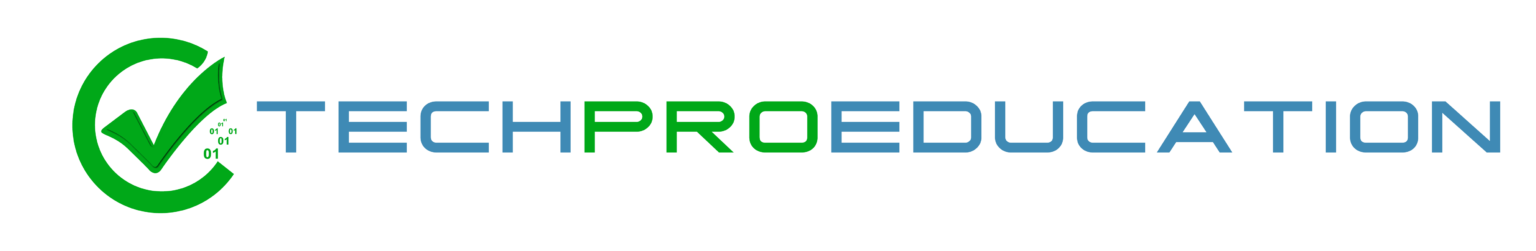